## Parte 1 - Análise das métricas das 15 IFs

In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all, reviews
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google_play_scraper import app

lista_bancos = ['br.com.gabba.Caixa',
'com.bradesco',
'com.itau',
'com.nu.production',
'br.com.bb.android',
'com.santander.app',
'br.com.original.bank',
'com.mercadopago.wallet',
'com.b2winc.amedigital',
'br.com.uol.ps.myaccount',
'br.com.intermedium',
'com.c6bank.app',
'com.btg.pactual.banking',
'br.com.neon',
'com.votorantim.bvpd']

df = list()

for banco in lista_bancos:
    result = app(banco,
    lang='pt', # definindo a linguagem que queremos pegar
    country='br' # Google Play de qual país?'
    )
    df.append(result)
    
    

In [3]:
df_new = pd.json_normalize(df)

In [4]:
# Função para expandir listas em novas colunas
def expand_list(row):
    for i, value in enumerate(row['histogram']):
        row[f'Nota_{i+1}'] = value
    return row

# Aplicando a função em cada linha do DataFrame
df_expanded = df_new.apply(expand_list, axis=1)

# Removendo a coluna original 'Itens'
df_final = df_expanded.drop('histogram', axis=1)

# Dicionário de substituições
substituicoes = {
    'Neon conta digital, cartão de crédito, empréstimo': 'Banco Neon',
    'americanas s.a.': 'Ame Digital',
    'Mercado Libre': 'Mercado Pago'
}

# Aplicando as substituições na coluna 'developer' do DataFrame
df_final['developer'] = df_final['developer'].replace(substituicoes)

print("\nDataFrame com listas expandidas em novas colunas:")
df_final.head()



DataFrame com listas expandidas em novas colunas:


,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,updated,version,comments,appId,url,Nota_1,Nota_2,Nota_3,Nota_4,Nota_5
0,CAIXA,O aplicativo Caixa facilita seu dia a dia! Voc...,O aplicativo Caixa facilita seu dia a dia! Voc...,Quer mais de uma centena de possibilidades em ...,100.000.000+,100000000,171947748,4.673539,4551915,2116947,...,1729512331,4.9.0,[],br.com.gabba.Caixa,https://play.google.com/store/apps/details?id=...,167502,40959,107262,478606,3757581
1,"Bradesco: Conta, Cartão e Pix!",Abra sua conta em poucos passos e comece já a ...,Abra sua conta em poucos passos e comece já a ...,"Cartão, compras com cashback, empréstimos e ma...",100.000.000+,100000000,106018224,4.574296,4870455,1180226,...,1731360602,4.61.0,[],com.bradesco,https://play.google.com/store/apps/details?id=...,282240,76136,153096,409800,3949178
2,"Banco Itaú: Conta, Cartão e +",Tudo o que você pode fazer pelo app:\r\n\r\n◉ ...,Tudo o que você pode fazer pelo app:<br><br>◉ ...,"Cartão de crédito, cashback, investimentos, em...",50.000.000+,50000000,89462660,4.568687,4056506,990215,...,1732239206,7.085.5,[],com.itau,https://play.google.com/store/apps/details?id=...,260757,60419,111823,301682,3321820
3,"Nubank: conta, cartão e mais",O Nubank é a instituição financeira mais recom...,O Nubank é a instituição financeira mais recom...,"Cartão de crédito, Empréstimos, Investimentos,...",100.000.000+,100000000,186374871,4.768120,3963209,851047,...,1731760717,Varies with device,[],com.nu.production,https://play.google.com/store/apps/details?id=...,106772,33146,75272,241912,3506102
4,Banco do Brasil: Conta Digital,😀 Quer abrir uma conta digital grátis e acessa...,😀 Quer abrir uma conta digital grátis e acessa...,"Cartão de Crédito, Pix, Empréstimo, Investimen...",100.000.000+,100000000,103238184,4.587459,6927094,1495404,...,1731545405,9.42.0.2,[],br.com.bb.android,https://play.google.com/store/apps/details?id=...,413257,94962,190545,538696,5689628


In [5]:
# Total de votantes
df_final['Total votantes'] = df_final[['Nota_1', 'Nota_2', 'Nota_3', 'Nota_4', 'Nota_5']].sum(axis=1)

# O total de promotores
df_final['Total promotores'] = df_final['Nota_5'] 

# O total de neutros
df_final['Total neutros'] = df_final['Nota_4'] 

# Soma os valores das colunas de notas detratoras (Nota_1, Nota_2 e Nota_3) por linha
df_final['Total detratores'] = df_final[['Nota_1', 'Nota_2', 'Nota_3']].sum(axis=1)

# Calcula a Nota NPS Ajustada
df_final['Nota NPS Ajustada'] = (df_final['Total promotores'] - df_final['Total detratores']) / df_final['Total votantes']

# Salva os resultados em um arquivo Excel
df_final.to_excel('resultados_app.xlsx')


In [6]:
df_graf_1 = df_final.sort_values(by='score', ascending=False)

df_graf_1 = df_graf_1[['score', 'developer']].reset_index()

C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\3464873193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_graf_1, x='developer', y='score', palette='viridis')
C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\3464873193.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


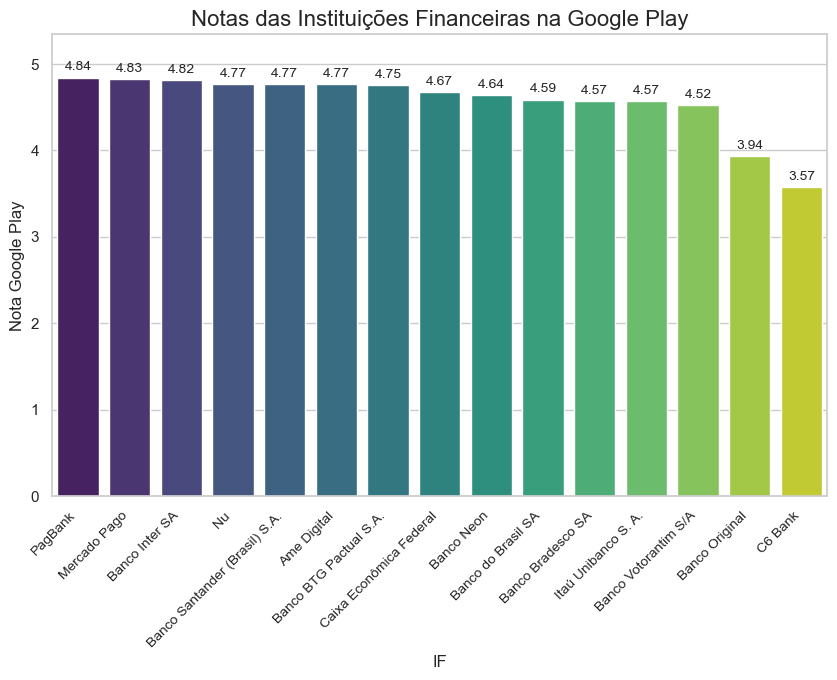

In [7]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_graf_1, x='developer', y='score', palette='viridis')

# Adicionando rótulos de dados com ajuste de posição
for index, row in df_graf_1.iterrows():
    ax.text(index, row['score'] + 0.05,  # Aumentando a altura para evitar sobreposição
            f"{round(row['score'], 2)}", 
            ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
ax.set_title('Notas das Instituições Financeiras na Google Play', fontsize=16)
ax.set_xlabel('IF', fontsize=12)
ax.set_ylabel('Nota Google Play', fontsize=12)

# Rotacionando os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustando os limites do eixo Y para dar mais espaço
ax.set_ylim(0, df_graf_1['score'].max() + 0.5)

# Removendo a legenda
ax.legend_.remove() if ax.get_legend() else None

# Exibindo o gráfico
plt.show()

In [8]:
df_graf_1[['developer','score']]

,developer,score
0,PagBank,4.842176
1,Mercado Pago,4.827662
2,Banco Inter SA,4.816691
3,Nu,4.768120
4,Banco Santander (Brasil) S.A.,4.765653
5,Ame Digital,4.765561
6,Banco BTG Pactual S.A.,4.751824
7,Caixa Econômica Federal,4.673539
8,Banco Neon,4.638668
9,Banco do Brasil SA,4.587459


In [9]:
df_graf_2 = df_final.sort_values(by='realInstalls', ascending=False)
df_graf_2 = df_graf_2[['realInstalls', 'developer']].reset_index()

In [10]:
df_final['developer'].unique()

array(['Caixa Econômica Federal', 'Banco Bradesco SA',
       'Itaú Unibanco S. A.', 'Nu', 'Banco do Brasil SA',
       'Banco Santander (Brasil) S.A.', 'Banco Original', 'Mercado Pago',
       'Ame Digital', 'PagBank', 'Banco Inter SA', 'C6 Bank',
       'Banco BTG Pactual S.A.', 'Banco Neon', 'Banco Votorantim S/A'],
      dtype=object)

C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\2350538229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_graf_2, x='developer', y='realInstalls_milhoes', palette='viridis')
C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\2350538229.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


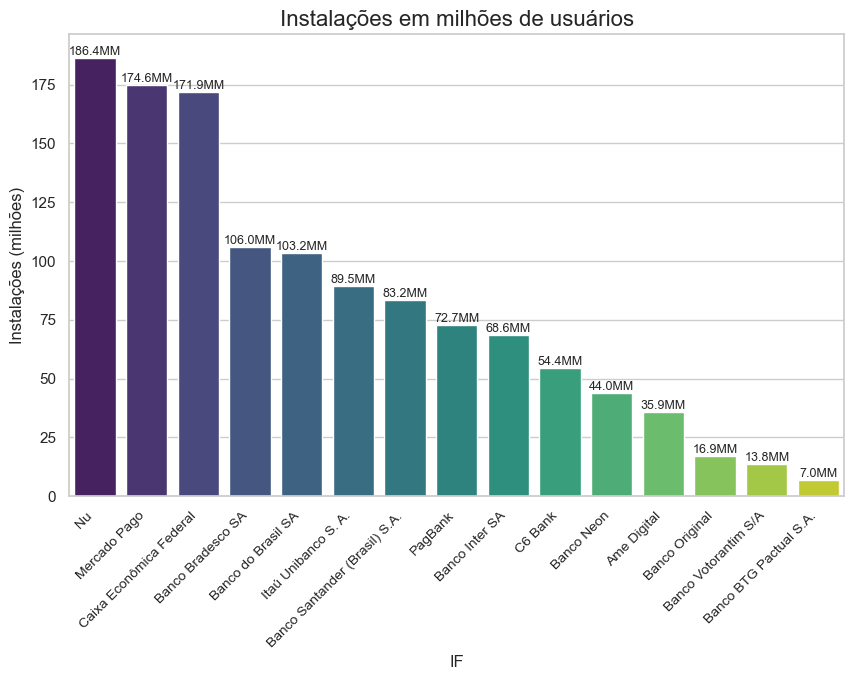

In [11]:
# Convertendo as instalações para milhões
df_graf_2['realInstalls_milhoes'] = df_graf_2['realInstalls'] / 1_000_000

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_graf_2, x='developer', y='realInstalls_milhoes', palette='viridis')

# Adicionando rótulos de dados com ajuste de posição
for index, row in df_graf_2.iterrows():
    ax.text(index, row['realInstalls_milhoes'] + 0.1,  # Ajustando a posição do rótulo
            f"{round(row['realInstalls_milhoes'], 1)}MM", 
            ha='center', va='bottom', fontsize=9)

# Personalizando o gráfico
ax.set_title('Instalações em milhões de usuários', fontsize=16)
ax.set_xlabel('IF', fontsize=12)
ax.set_ylabel('Instalações (milhões)', fontsize=12)

# Rotacionando os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustando os limites do eixo Y para dar mais espaço
ax.set_ylim(0, df_graf_2['realInstalls_milhoes'].max() + 10)

# Removendo a legenda (caso exista)
ax.legend_.remove() if ax.get_legend() else None

# Exibindo o gráfico
plt.show()

In [12]:
df_graf_3 = df_final.sort_values(by='Nota NPS Ajustada', ascending=False)
df_graf_3 = df_graf_3[['Nota NPS Ajustada', 'developer']].reset_index()

C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\3553479678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_graf_3, x='developer', y='Nota NPS Ajustada', palette='viridis')
C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\3553479678.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


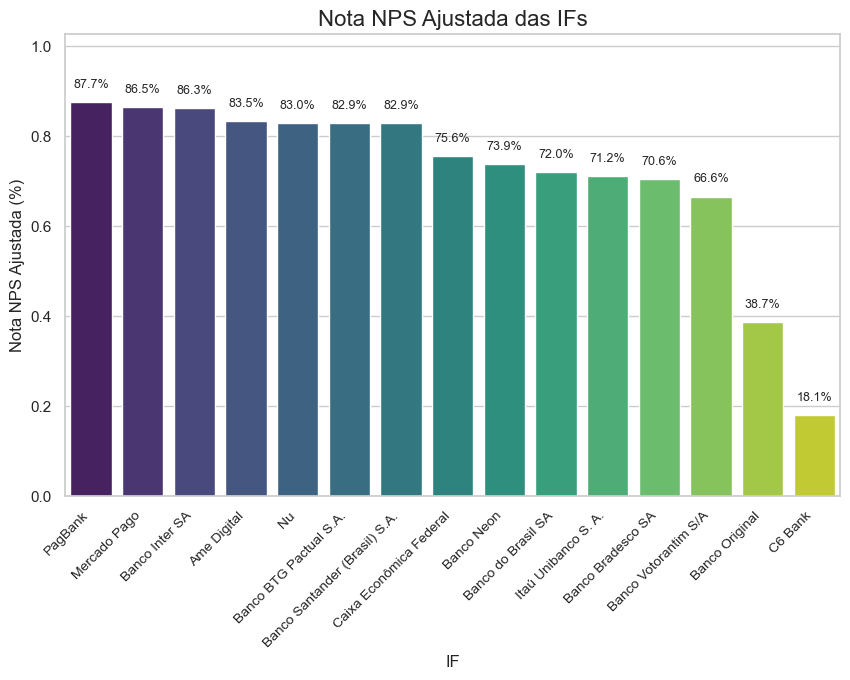

In [13]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_graf_3, x='developer', y='Nota NPS Ajustada', palette='viridis')

# Adicionando rótulos de dados com ajuste de posição
for index, row in df_graf_3.iterrows():
    ax.text(index, row['Nota NPS Ajustada'] + 0.025,  # Ajustando a posição do rótulo
            f"{round(row['Nota NPS Ajustada'] * 100, 1)}%",  # Arredondando para 1 casa decimal e exibindo como porcentagem
            ha='center', va='bottom', fontsize=9)

# Personalizando o gráfico
ax.set_title('Nota NPS Ajustada das IFs', fontsize=16)
ax.set_xlabel('IF', fontsize=12)
ax.set_ylabel('Nota NPS Ajustada (%)', fontsize=12)

# Rotacionando os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustando os limites do eixo Y para dar mais espaço
ax.set_ylim(0, df_graf_3['Nota NPS Ajustada'].max() + 0.15)

# Removendo a legenda (caso exista)
ax.legend_.remove() if ax.get_legend() else None

# Exibindo o gráfico
plt.show()

In [14]:
df_graf_3[['developer','Nota NPS Ajustada']]

,developer,Nota NPS Ajustada
0,PagBank,0.876840
1,Mercado Pago,0.864618
2,Banco Inter SA,0.863272
3,Ame Digital,0.834709
4,Nu,0.830367
5,Banco BTG Pactual S.A.,0.828880
6,Banco Santander (Brasil) S.A.,0.828836
7,Caixa Econômica Federal,0.756135
8,Banco Neon,0.739217
9,Banco do Brasil SA,0.720485


## Parte 2 -  Criação de modelos BERT, TD-IDF e Dicionarização dos comentários da google play

In [22]:
# Função para coletar até 1000 comentários detratores (1-3 estrelas) mais relevantes
def coletar_comentarios_detratores(app_id, max_comentarios=1000):
    print(f"Coletando até {max_comentarios} comentários detratores para {app_id}...")
    
    comentarios_totais = []
    continuacao_token = None  # Inicializando o token de continuação para reviews paginadas

    try:
        while True:
            comentarios, continuacao_token = reviews(
                app_id,
                lang='pt',  # Idioma dos comentários
                country='br',  # País
                sort=Sort.MOST_RELEVANT,  # Ordenar pelos mais relevantes
                count=100,  # Número de comentários por lote (máximo de 100 por vez)
                continuation_token=continuacao_token  # Token para paginação
            )
            
            # Filtrar apenas comentários com notas de 1 a 3 (detratores)
            comentarios_detratores = [comentario for comentario in comentarios if comentario['score'] <= 3]
            comentarios_totais.extend(comentarios_detratores)
            
            # Verificar se já temos 1000 comentários ou se não há mais comentários para buscar
            if len(comentarios_totais) >= max_comentarios or continuacao_token is None:
                break
        
    except Exception as e:
        print(f"Erro ao coletar comentários para {app_id}: {e}")
        return pd.DataFrame()  # Retorna DataFrame vazio em caso de erro
    
    # Limitar o número de comentários ao máximo solicitado (1000)
    comentarios_totais = comentarios_totais[:max_comentarios]
    
    # Convertendo a lista de dicionários em DataFrame do pandas
    df = pd.DataFrame(comentarios_totais)
    return df

In [244]:
# Função para coletar até 30 comentários detratores (1-3 estrelas) com mais de 5 palavras
def coletar_comentarios_detratores_teste(app_id, max_comentarios=30):
    print(f"Coletando até {max_comentarios} comentários detratores com mais de 5 palavras para {app_id}...")
    
    comentarios_totais = []
    continuacao_token = None  # Inicializando o token de continuação para reviews paginadas

    try:
        while True:
            comentarios, continuacao_token = reviews(
                app_id,
                lang='pt',  # Idioma dos comentários
                country='br',  # País
                sort=Sort.NEWEST,  # Ordenar pelos mais novos
                count=100,  # Número de comentários por lote (máximo permitido)
                continuation_token=continuacao_token  # Token para paginação
            )
            
            # Filtrar apenas comentários com notas de 1 a 3 (detratores)
            comentarios_detratores = [
                comentario for comentario in comentarios
                if comentario['score'] <= 3 and len(comentario['content'].split()) > 5  # Mais de 5 palavras
            ]
            comentarios_totais.extend(comentarios_detratores)
            
            # Verificar se já temos o número desejado de comentários ou se não há mais para buscar
            if len(comentarios_totais) >= max_comentarios or continuacao_token is None:
                break
        
    except Exception as e:
        print(f"Erro ao coletar comentários para {app_id}: {e}")
        return pd.DataFrame()  # Retorna DataFrame vazio em caso de erro
    
    # Limitar o número de comentários ao máximo solicitado (30)
    comentarios_totais = comentarios_totais[:max_comentarios]
    
    # Convertendo a lista de dicionários em DataFrame do pandas
    df = pd.DataFrame(comentarios_totais)
    return df

In [24]:
# Criar um DataFrame vazio para armazenar todos os comentários
df_comentarios = pd.DataFrame()

In [26]:
# Coletar comentários para cada aplicativo
for banco in lista_bancos:
    df_banco = coletar_comentarios_detratores(banco)
    
    if not df_banco.empty:
        df_banco['app_id'] = banco  # Adicionar uma coluna com o ID do app
        df_comentarios = pd.concat([df_comentarios, df_banco], ignore_index=True)


Coletando até 1000 comentários detratores para br.com.gabba.Caixa...
Coletando até 1000 comentários detratores para com.bradesco...
Coletando até 1000 comentários detratores para com.itau...
Coletando até 1000 comentários detratores para com.nu.production...
Coletando até 1000 comentários detratores para br.com.bb.android...
Coletando até 1000 comentários detratores para com.santander.app...
Coletando até 1000 comentários detratores para br.com.original.bank...
Coletando até 1000 comentários detratores para com.mercadopago.wallet...
Coletando até 1000 comentários detratores para com.b2winc.amedigital...
Coletando até 1000 comentários detratores para br.com.uol.ps.myaccount...
Coletando até 1000 comentários detratores para br.com.intermedium...
Coletando até 1000 comentários detratores para com.c6bank.app...
Coletando até 1000 comentários detratores para com.btg.pactual.banking...
Coletando até 1000 comentários detratores para br.com.neon...
Coletando até 1000 comentários detratores par

In [27]:
# Salvar os comentários em um arquivo Excel
df_comentarios.to_excel('comentarios_bancos_google_play.xlsx')

In [28]:
# Criar um DataFrame vazio para armazenar todos os comentários
df_comentarios_teste = pd.DataFrame()

In [245]:
# Coletar comentários para cada aplicativo
for banco in lista_bancos:
    df_banco = coletar_comentarios_detratores_teste(banco)
    
    if not df_banco.empty:
        df_banco['app_id'] = banco  # Adicionar uma coluna com o ID do app
        df_comentarios_teste = pd.concat([df_comentarios_teste, df_banco], ignore_index=True)


Coletando até 30 comentários detratores com mais de 5 palavras para br.com.gabba.Caixa...
Coletando até 30 comentários detratores com mais de 5 palavras para com.bradesco...
Coletando até 30 comentários detratores com mais de 5 palavras para com.itau...
Coletando até 30 comentários detratores com mais de 5 palavras para com.nu.production...
Coletando até 30 comentários detratores com mais de 5 palavras para br.com.bb.android...
Coletando até 30 comentários detratores com mais de 5 palavras para com.santander.app...
Coletando até 30 comentários detratores com mais de 5 palavras para br.com.original.bank...


C:\Users\caio_\AppData\Local\Temp\ipykernel_21804\1506589469.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_comentarios_teste = pd.concat([df_comentarios_teste, df_banco], ignore_index=True)


Coletando até 30 comentários detratores com mais de 5 palavras para com.mercadopago.wallet...


C:\Users\caio_\AppData\Local\Temp\ipykernel_21804\1506589469.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_comentarios_teste = pd.concat([df_comentarios_teste, df_banco], ignore_index=True)


Coletando até 30 comentários detratores com mais de 5 palavras para com.b2winc.amedigital...
Coletando até 30 comentários detratores com mais de 5 palavras para br.com.uol.ps.myaccount...
Coletando até 30 comentários detratores com mais de 5 palavras para br.com.intermedium...
Coletando até 30 comentários detratores com mais de 5 palavras para com.c6bank.app...
Coletando até 30 comentários detratores com mais de 5 palavras para com.btg.pactual.banking...
Coletando até 30 comentários detratores com mais de 5 palavras para br.com.neon...
Coletando até 30 comentários detratores com mais de 5 palavras para com.votorantim.bvpd...


In [246]:
# Salvar os comentários em um arquivo Excel
df_comentarios_teste.to_excel('comentarios_bancos_teste_new.xlsx')

In [ ]:
print("Coleta de comentários finalizada e salva no arquivo 'comentarios_bancos_teste.xlsx'.")

In [15]:
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import CrossEntropyLoss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import torch
import unicodedata
import emoji
import re

In [16]:
def remover_emojis(texto):
    return emoji.replace_emoji(texto, replace='')

In [17]:
# Função para remover acentuação
def remover_acentos(texto):
    return ''.join(c for c in unicodedata.normalize('NFKD', texto) if unicodedata.category(c) != 'Mn')

In [18]:
# Função para pré-processar os comentários
def preprocessar_texto(texto):
    
    # Remover emojis
    texto = remover_emojis(texto)
    
    # Remover URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto)
    
    # Remover menções (@usuario)
    texto = re.sub(r'@\w+', '', texto)
    
    return texto

In [19]:
# Carregar o conjunto de dados rotulado (supondo que temos um dataset com categorias definidas)
df_rotulado = pd.read_excel(r"C:\Users\caio_\OneDrive\Documentos\Python Scripts\comentarios_bancos_teste.xlsx")
df_completo = pd.read_excel(r'C:\Users\caio_\OneDrive\Documentos\Python Scripts\comentarios_bancos_google_play.xlsx')

In [22]:
df_rotulado['texto_processado'] = df_rotulado['content']
df_completo['texto_processado'] = df_completo['content']

In [23]:
# Pré-processar o texto dataframe rotulado
df_rotulado['texto_processado'] = df_rotulado['texto_processado'].apply(preprocessar_texto)
df_rotulado['texto_processado'] = df_rotulado['texto_processado'].apply(remover_emojis)

# Pré-processar o texto dataframe completo
df_completo['texto_processado'] = df_completo['texto_processado'].apply(preprocessar_texto)
df_completo['texto_processado'] = df_completo['texto_processado'].apply(remover_emojis)

In [24]:
df_rotulado['texto_processado']

0      Esses dias ficou o dia inteiro fora do ar........
1      Muito bom o aplicativo só gostaria de saber co...
2      Dei 1 estrela pq não tem como dar 0. Do nada n...
3                Por enquanto nenhuma muito difícil usar
4      Não funciona. Simplesmente trava e não há quem...
                             ...                        
445    Falta alguns detalhes,como exemplo email com d...
446    Lixo de aplicativo, tento pagar a parcela do c...
447    Infelizmente a última atualização deixou a des...
448    Orrivel tenho uma chave Pix nesse banco que eu...
449    Não sei como entrar no app coloco a senha mais...
Name: texto_processado, Length: 450, dtype: object

In [25]:
df_completo['texto_processado']

0        PÉSSIMO Erros constantes do app dizendo que nã...
1        Muitos erros na aba de acessar os contratos de...
2        O aplicativo da Caixa Econômica Federal deixa ...
3        Como pode um banco tão grande oscilar tanto em...
4        O aplicativo era ótimo, aí inventaram essa últ...
                               ...                        
22995    Simplesmente não funciona, celular Samsung And...
22996    Estou 4 dias que o aplicativo não funciona tod...
22997    Aplicativo trava MUITO e/ou NÃO funciona (fiz ...
22998    Horrível. Quando recebi o e-mail para instalar...
22999    Na tem um suporte bom é péssimo para soluciona...
Name: texto_processado, Length: 23000, dtype: object

In [26]:
df_rotulado.dropna(subset=['avaliacao humana'], inplace=True)

In [27]:
df_rotulado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 449
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            435 non-null    int64         
 1   reviewId              435 non-null    object        
 2   userName              435 non-null    object        
 3   userImage             435 non-null    object        
 4   content               435 non-null    object        
 5   score                 435 non-null    int64         
 6   thumbsUpCount         435 non-null    int64         
 7   reviewCreatedVersion  358 non-null    object        
 8   at                    435 non-null    datetime64[ns]
 9   replyContent          255 non-null    object        
 10  repliedAt             255 non-null    datetime64[ns]
 11  appVersion            358 non-null    object        
 12  app_id                435 non-null    object        
 13  avaliacao humana      435

In [28]:
df_graf_cat = pd.pivot_table(df_rotulado, index='avaliacao humana', aggfunc='count')

In [29]:
df_graf_cat = pd.pivot_table(df_rotulado, index='avaliacao humana', aggfunc='count')
df_graf_cat = df_graf_cat.reset_index()
df_graf_cat = df_graf_cat.sort_values(by='app_id', ascending=False)


In [30]:
df_graf_cat[['avaliacao humana', 'app_id']]

,avaliacao humana,app_id
5,Serviços e produtos,145
1,Erros de entrada e autenticação,91
6,Usabilidade e acessibilidade,75
7,Velocidade e desempenho,45
2,Erros transacionais,35
3,Funcionalidade e integração,21
0,Design visual e personalização,17
4,Segurança,6


C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\1266922303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


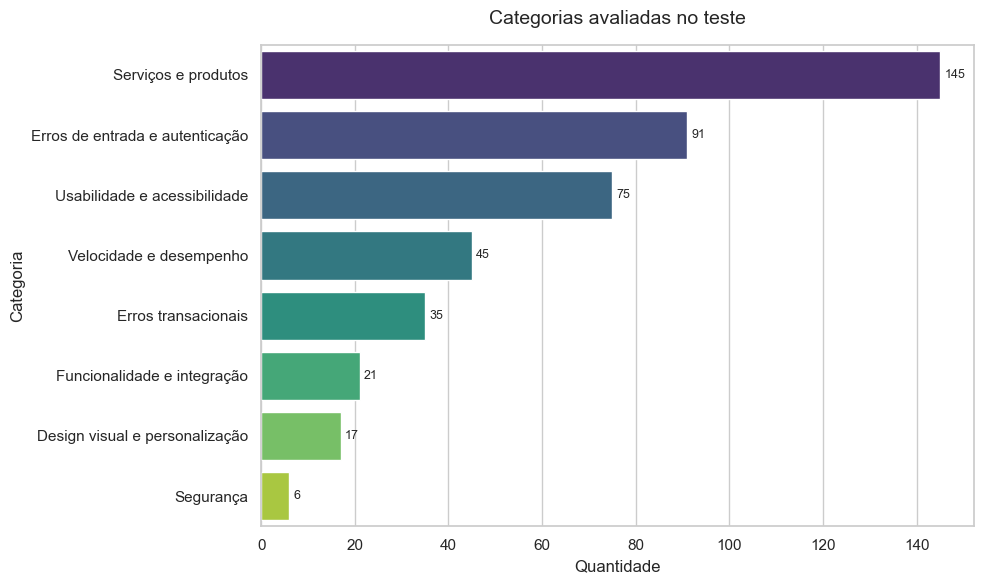

In [31]:
sns.set(style="whitegrid")

# Criar gráfico de barras horizontais com ajustes nos rótulos de dados
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_graf_cat, 
    y="avaliacao humana", 
    x="app_id", 
    palette="viridis"
)

# Adicionar rótulos de dados sem casas decimais
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=9)

# Configurar título e rótulos
plt.title("Categorias avaliadas no teste", fontsize=14, pad=15)
plt.xlabel("Quantidade", fontsize=12)
plt.ylabel("Categoria", fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [32]:
# Conversão da categoria para valores numéricos
label_mapping = {label: idx for idx, label in enumerate(df_rotulado['avaliacao humana'].unique())}
df_rotulado['num_categoria'] = df_rotulado['avaliacao humana'].map(label_mapping)

In [33]:
# Inicializar o tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

# Divisão dos dados
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_rotulado["texto_processado"].tolist(),
    df_rotulado["num_categoria"].tolist(),
    test_size=0.3,
    random_state=77
)

# Tokenizar os textos
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.


In [34]:
# Calcular ponderação das classes
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=list(range(len(label_mapping))),
    y=df_rotulado["num_categoria"].tolist()
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to("cuda" if torch.cuda.is_available() else "cpu")

# Inicializar o modelo
model_bert = DistilBertForSequenceClassification.from_pretrained(
    "neuralmind/bert-base-portuguese-cased",
    num_labels=len(label_mapping)
)

# Configurar otimizador
optimizer = AdamW(model_bert.parameters(), lr=1e-5)

# Definir dispositivo
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_bert.to(device)

# Preparar os dados
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Loop de treinamento
epochs = 5
loss_fn = CrossEntropyLoss(weight=class_weights)  # Incorporar os pesos das classes

for epoch in range(epochs):
    model_bert.train()
    total_loss = 0

    for batch in train_loader:
        inputs, masks, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()

        outputs = model_bert(input_ids=inputs, attention_mask=masks, labels=labels)
        loss = loss_fn(outputs.logits, labels)  # Usar loss ponderada
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Loss média: {avg_loss:.4f}")

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transforme

Epoch 1, Loss média: 2.1544
Epoch 2, Loss média: 2.0599
Epoch 3, Loss média: 2.0757
Epoch 4, Loss média: 2.0310
Epoch 5, Loss média: 2.0273


In [65]:
# Avaliação do modelo
model_bert.eval()
predictions, true_labels = [], []

for batch in val_loader:
    inputs, masks, labels = [x.to(device) for x in batch]
    with torch.no_grad():
        outputs = model_bert(input_ids=inputs, attention_mask=masks)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).cpu().tolist())
        true_labels.extend(labels.cpu().tolist())

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predictions)
print(conf_matrix)
print(classification_report(true_labels, predictions, target_names=label_mapping.keys()))

# Calculando o classification report
report = classification_report(true_labels, predictions, target_names=label_mapping.keys(), output_dict=True)

# Convertendo o classification report em um DataFrame
report_df = pd.DataFrame(report).transpose()

# Exibindo a tabela
print(report_df)

# Se quiser salvar a tabela em um arquivo CSV
report_df.to_csv("classification_report_DistilBERT.csv", index=True)

# Salvar o modelo e o tokenizer
model_bert.save_pretrained("modelo_distilbert")
tokenizer.save_pretrained("modelo_distilbert")

[[ 0 13  0  0  3  0  0  0]
 [ 0 29  4  0  6  0  0  0]
 [ 0 11  6  0  9  0  0  0]
 [ 0 13  1  2  7  0  0  0]
 [ 0  6  0  0  7  0  0  1]
 [ 0  5  0  0  0  0  0  0]
 [ 0  3  0  0  3  0  0  0]
 [ 0  1  0  0  1  0  0  0]]
                                 precision    recall  f1-score   support

            Erros transacionais       0.00      0.00      0.00        16
            Serviços e produtos       0.36      0.74      0.48        39
Erros de entrada e autenticação       0.55      0.23      0.32        26
   Usabilidade e acessibilidade       1.00      0.09      0.16        23
        Velocidade e desempenho       0.19      0.50      0.28        14
 Design visual e personalização       0.00      0.00      0.00         5
    Funcionalidade e integração       0.00      0.00      0.00         6
                      Segurança       0.00      0.00      0.00         2

                       accuracy                           0.34       131
                      macro avg       0.26      0.2

c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metr

('modelo_distilbert\\tokenizer_config.json',
 'modelo_distilbert\\special_tokens_map.json',
 'modelo_distilbert\\vocab.txt',
 'modelo_distilbert\\added_tokens.json')

In [43]:
import matplotlib
print(matplotlib.__version__)

3.8.0


In [45]:
import matplotlib

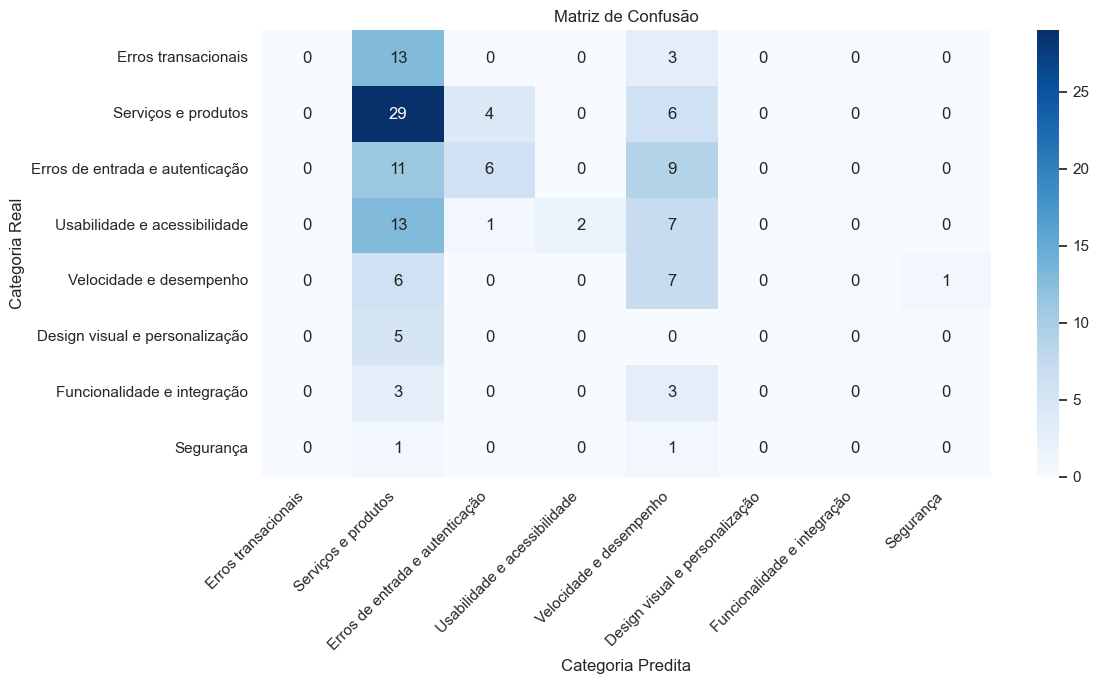

In [48]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predictions)

# Criando o gráfico
plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix,
            annot= True,
            fmt="d", 
            cmap="Blues", 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys()
            )
plt.title("Matriz de Confusão")
plt.xlabel("Categoria Predita")
plt.ylabel("Categoria Real")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Exibir a matriz de confusão
plt.tight_layout()
plt.show()


In [49]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [50]:
# Baixar recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializando ferramentas
stop_words = set(stopwords.words('portuguese'))  # Stopwords em português
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\caio_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caio_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\caio_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
# Função de pré-processamento
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    
    # Remover URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Remover pontuações
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenização
    tokens = word_tokenize(text)
    
    # Remover stopwords e lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Reunir palavras em um texto novamente
    processed_text = ' '.join(tokens)
    
    return processed_text

In [52]:
df_rotulado['texto_processado_tfidf'] = df_rotulado['content']
df_completo['texto_processado_tfidf'] = df_completo['content']

In [53]:
# Pré-processar o texto dataframe rotulado
df_rotulado['texto_processado_tfidf'] = df_rotulado['texto_processado'].apply(preprocess_text)
df_rotulado['texto_processado_tfidf'] = df_rotulado['texto_processado'].apply(remover_emojis)

# Pré-processar o texto dataframe completo
df_completo['texto_processado_tfidf'] = df_completo['texto_processado_tfidf'].apply(preprocess_text)
df_completo['texto_processado_tfidf'] = df_completo['texto_processado_tfidf'].apply(remover_emojis)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 3))
X = vectorizer.fit_transform(df_rotulado['texto_processado_tfidf'])
y = df_rotulado['avaliacao humana']

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

# Dicionário para armazenar modelos e seus resultados
modelos = {
    "Regressão Logística": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=77),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=77),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear Kernel)": LinearSVC(max_iter=3000, random_state=77)
}

# Loop para treinar e avaliar cada modelo
resultados = {}

for nome, modelo in modelos.items():
    print(f"Treinando e avaliando o modelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    acuracia = accuracy_score(y_test, y_pred)
    print(f"Acurácia de {nome}: {acuracia:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    # Salvar resultados
    resultados[nome] = {
        "modelo": modelo,
        "acuracia": acuracia,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }

# Selecionar o modelo com maior precisão
melhor_modelo = max(resultados, key=lambda x: resultados[x]['acuracia'])

print(f"\nO melhor modelo é: {melhor_modelo} com uma acurácia de {resultados[melhor_modelo]['acuracia']:.4f}")

# Exemplo de uso do modelo vencedor:
modelo_vencedor = resultados[melhor_modelo]["modelo"]
melhor_modelo = modelo

# Calculando o classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convertendo o classification report em um DataFrame
report_df = pd.DataFrame(report).transpose()

# Exibindo a tabela
print(report_df)

# Se quiser salvar a tabela em um arquivo CSV
report_df.to_csv("classification_report_TF-IDF.csv", index=True)

import pickle

# Salvar o modelo vencedor e o vetor TF-IDF
with open("melhor_modelo.pkl", "wb") as f:
    pickle.dump(melhor_modelo, f)

with open("vetor_tfidf.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Melhor modelo e vetor TF-IDF salvos com sucesso!")

Treinando e avaliando o modelo: Regressão Logística
Acurácia de Regressão Logística: 0.4885
                                 precision    recall  f1-score   support

 Design visual e personalização       0.00      0.00      0.00         5
Erros de entrada e autenticação       0.54      0.54      0.54        26
            Erros transacionais       0.00      0.00      0.00        16
    Funcionalidade e integração       0.00      0.00      0.00         6
                      Segurança       0.00      0.00      0.00         2
            Serviços e produtos       0.46      0.92      0.61        39
   Usabilidade e acessibilidade       0.45      0.43      0.44        23
        Velocidade e desempenho       1.00      0.29      0.44        14

                       accuracy                           0.49       131
                      macro avg       0.31      0.27      0.25       131
                   weighted avg       0.43      0.49      0.41       131

[[ 0  0  0  0  0  4  1  0]
 [

c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metr

Acurácia de Random Forest: 0.5191
                                 precision    recall  f1-score   support

 Design visual e personalização       0.00      0.00      0.00         5
Erros de entrada e autenticação       0.50      0.69      0.58        26
            Erros transacionais       0.00      0.00      0.00        16
    Funcionalidade e integração       0.00      0.00      0.00         6
                      Segurança       0.00      0.00      0.00         2
            Serviços e produtos       0.54      0.87      0.67        39
   Usabilidade e acessibilidade       0.38      0.39      0.38        23
        Velocidade e desempenho       0.88      0.50      0.64        14

                       accuracy                           0.52       131
                      macro avg       0.29      0.31      0.28       131
                   weighted avg       0.42      0.52      0.45       131

[[ 0  1  0  0  0  0  3  1]
 [ 0 18  0  0  0  5  3  0]
 [ 0  7  0  0  0  6  3  0]
 [ 0  

c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caio_\anaconda3\Lib\site-packages\sklearn\metr

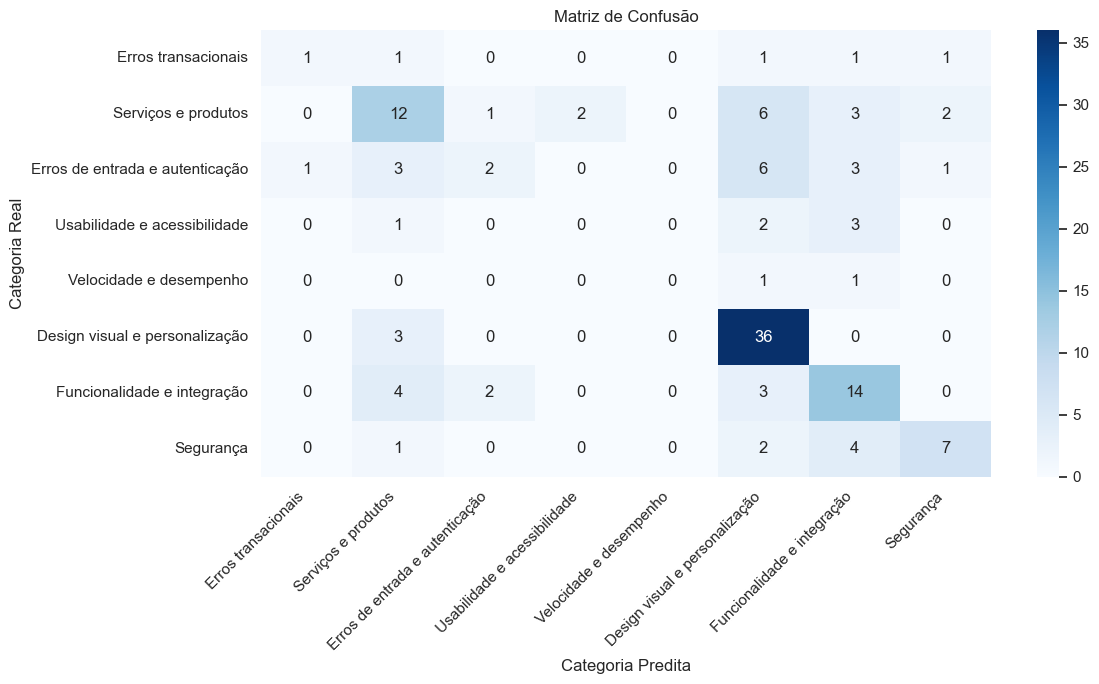

In [55]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Criando o gráfico
plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix,
            annot= True,
            fmt="d", 
            cmap="Blues", 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys()
            )
plt.title("Matriz de Confusão")
plt.xlabel("Categoria Predita")
plt.ylabel("Categoria Real")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Exibir a matriz de confusão
plt.tight_layout()
plt.show()

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Carregar o modelo
with open("melhor_modelo.pkl", "rb") as f:
    modelo_carregado = pickle.load(f)

# Carregar o vetor TF-IDF
with open("vetor_tfidf.pkl", "rb") as f:
    vetor_carregado = pickle.load(f)

In [57]:
# Verificar o tipo do modelo carregado
print(type(modelo_carregado))

<class 'sklearn.svm._classes.LinearSVC'>


In [58]:
# Dicionário de palavras específicas
dicionario_categorias = {
    "Segurança": ["fraude", "golpe", "invasão", "senha", "segurança", "inseguro", "insegura", "clonado"],
    "Usabilidade e Acessibilidade": ["menu", "dificuldade", "acessível", "confuso", "navegação"],
    "Velocidade e Desempenho": ["lento", "travado", "demora", "carregamento", "bugado", "bug", "bugs", "carrega", "demorado"],
    "Design e Personalização": ["layout", "visual", "cores", "aparência", "confusão", "poluído", "design"],
    "Problemas Transacionais": ["erro", "pagamento", "boleto", "cancelado", "transação", " fazer pix", "transferir", "receber"],
    "Serviços e Produtos": ["tarifa", "taxa", "atendimento", "produto", "serviço", "crédito", "limite", "cartão de crédito"],
    "Problemas de entrada e autenticação": ["login", "senha", "acesso", "autenticar", "erro", "biometria", "autenticação", "reconhecimento", "logar"],
    "Funcionalidade e Integração": ["pix", "apple pay", "google pay", "compatibilidade", "funcionalidade", "função"]
}

In [59]:
# Tokenizar a base real
real_encodings = tokenizer(df_completo["texto_processado"].tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")
real_dataset = torch.utils.data.TensorDataset(real_encodings['input_ids'], real_encodings['attention_mask'])
real_loader = torch.utils.data.DataLoader(real_dataset, batch_size=16)

In [60]:
# Função para prever categoria usando o dicionário
def predict_with_dictionary(text, dicionario_categorias):
    for categoria, palavras in dicionario_categorias.items():
        for palavra in palavras:
            if palavra in text.lower():  # Verifica se a palavra chave está no texto
                return categoria
    return "Outros"  # Caso não encontre nenhuma palavra chave

# Mapeamento de índices para nomes de categorias
index_to_category = {
    0: "Design e Personalização",
    1: "Funcionalidade e integração",
    2: "Problemas de entrada e autenticação",
    3: "Problemas transacionais",
    4: "Segurança",
    5: "Serviços e produtos",
    6: "Usabilidade e Acessibilidade",
    7: "Velocidade e Desempenho"
}

In [61]:
# 4. Função para prever usando o modelo BERT
def predict_with_bert(text, tokenizer, model_bert):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model_bert(**inputs)
    logits = outputs.logits
    prediction_index = torch.argmax(logits, dim=1).item()
    prediction_category = index_to_category.get(prediction_index, "Categoria desconhecida")  # Obter o nome da categoria
    return prediction_category


In [62]:

# 5. Função para prever com o modelo TF-IDF
def predict_with_tfidf(text, vetor_carregado, modelo_carregado):
    X = vetor_carregado.transform([text])
    prediction = modelo_carregado.predict(X)
    return prediction[0]


In [63]:
# 6. Processamento e previsão para a base real
def processar_base_real(df_completo):
    # Inicialize as listas de previsões
    bert_predictions = []
    dict_predictions = []
    tfidf_predictions = []
    
    for text in df_completo['texto_processado']:
        # 6.1 Previsão com BERT
        bert_pred = predict_with_bert(text, tokenizer, model_bert)
        bert_predictions.append(bert_pred)
        
        # 6.2 Previsão com Dicionário
        dict_pred = predict_with_dictionary(text, dicionario_categorias)
        dict_predictions.append(dict_pred)
    
    for text in df_completo['texto_processado_tfidf']:
        # 6.3 Previsão com TF-IDF
        tfidf_pred = predict_with_tfidf(text, vetor_carregado, modelo_carregado)
        tfidf_predictions.append(tfidf_pred)

    # 7. Adicionar as previsões no DataFrame
    df_completo['Previsão_BERT'] = bert_predictions
    df_completo['Previsão_Dicionário'] = dict_predictions
    df_completo['Previsão_TFIDF'] = tfidf_predictions
    
    return df_completo

In [64]:
# Processar a base real e adicionar as previsões
df_completo_processado = processar_base_real(df_completo)

# Exibir o DataFrame final com as previsões
print(df_completo_processado.head())

# 9. Salvando o DataFrame com as previsões
df_completo_processado.to_excel('base_real_com_previsoes.xlsx')

   Unnamed: 0                              reviewId                  userName  \
0           0  0209e7e1-5393-4771-936b-9fb568fa3340             ROGER CARDOSO   
1           1  82bb8b06-6d42-478b-b834-e736c6b26ca5              Pietra Elias   
2           2  471a1b12-f8a2-4eb6-9a7f-cd33bf37ee7a  Douglas Ramos dos Santos   
3           3  10105335-3acd-46aa-8fc3-429a00e451aa      Jsrodrigues20 araujo   
4           4  e5317cb0-3190-48c4-9545-2003f18633ae                Kleiton LR   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  PÉSSIMO Erros constantes do app dizendo que nã...      1            131   
1  Muitos erros na a

In [68]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_completo_processado, x='Previsão_BERT', y='score', palette='colorblind')

# Adicionando rótulos de dados com ajuste de posição
for index, row in df_completo_processado.iterrows():
    ax.text(index, row['score'] + 0.05,  # Aumentando a altura para evitar sobreposição
            f"{round(row['score'], 2)}", 
            ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
ax.set_title('Notas das Instituições Financeiras na Google Play', fontsize=16)
ax.set_xlabel('IF', fontsize=12)
ax.set_ylabel('Nota Google Play', fontsize=12)

# Rotacionando os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustando os limites do eixo Y para dar mais espaço
ax.set_ylim(0, df_graf_1['score'].max() + 0.5)

# Removendo a legenda
ax.legend_.remove() if ax.get_legend() else None

# Exibindo o gráfico
plt.show()

C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\2448357197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_completo_processado, x='Previsão_BERT', y='score', palette='colorblind')
C:\Users\caio_\AppData\Local\Temp\ipykernel_17976\2448357197.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


ValueError: Image size of 3565001x712 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>